In [311]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

# Data Preprocessing

In [312]:
df = pd.read_csv("./dataset.csv")

#### Dataset Vizualization

In [313]:
malicious_count = len(df[df['is_malicious']==1])
benign_count = len(df[df['is_malicious']==0])

In [314]:
labels = ["Benign", "Malicious"]
frequency = [benign_count, malicious_count]

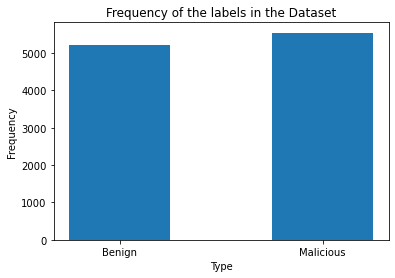

In [315]:
plt.bar(labels, frequency, width=0.5)
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Frequency of the labels in the Dataset")
plt.show()

#### Data Split

In [316]:
X = df.drop(["id", "is_malicious"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalization

In [317]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Random Forest

In [323]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()

In [324]:
params_rf = {
    "n_estimators": [800, 1200, 2000],
    "max_depth": [500, 600, 700],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

#### Training

In [325]:
rf = RandomizedSearchCV(rfclf, params_rf, cv=10, scoring="f1", n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [500, 600, 700],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [800, 1200, 2000]},
                   random_state=42, scoring='f1')

#### Results

In [326]:
rf_pred = rf.predict(X_test)

In [327]:
rf_score = f1_score(rf_pred, y_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1059
           1       0.89      0.92      0.91      1097

    accuracy                           0.91      2156
   macro avg       0.91      0.91      0.91      2156
weighted avg       0.91      0.91      0.91      2156



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()

In [44]:
params_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1000, 1500, 2000, 2500],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10]
}

#### Training

In [ ]:
dt = RandomizedSearchCV(dtclf, params_dt, cv=10, scoring="f1", n_jobs=-1, random_state=42)
dt.fit(X_train, y_train)

#### Results

In [46]:
dt_pred = dt.predict(X_test)

In [47]:
dt_score = f1_score(dt_pred, y_test)
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.90      0.88      0.89      1156

    accuracy                           0.88      2156
   macro avg       0.88      0.89      0.88      2156
weighted avg       0.89      0.88      0.89      2156



## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier()

In [57]:
params_knn = {
    "n_neighbors": range(3,100,2)
}

#### Training

In [ ]:
knn = RandomizedSearchCV(knnclf, params_knn, cv=10, scoring="f1", n_jobs=-1, random_state=42)
knn.fit(X_train, y_train)

#### Results

In [59]:
knn_pred = knn.predict(X_test)

In [60]:
knn_score = f1_score(knn_pred, y_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1081
           1       0.86      0.90      0.88      1075

    accuracy                           0.88      2156
   macro avg       0.88      0.88      0.88      2156
weighted avg       0.88      0.88      0.88      2156



## MLP

In [318]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier()

In [319]:
params_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#### Training

In [320]:
mlp = RandomizedSearchCV(mlpclf, params_mlp, cv=10, scoring="f1", n_jobs=-1, random_state=42)
mlp.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42, scoring='f1')

#### Results

In [321]:
mlp_pred = mlp.predict(X_test)

In [322]:
mlp_score = f1_score(mlp_pred, y_test)
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1025
           1       0.90      0.90      0.90      1131

    accuracy                           0.90      2156
   macro avg       0.90      0.90      0.90      2156
weighted avg       0.90      0.90      0.90      2156



## SVC

In [19]:
from sklearn.svm import SVC

svclf = SVC()

In [20]:
params_svc = {
    "kernel": ["linear", "rbf", "poly"],
    "gamma": [0.1, 1, 10],
    "C": [0.1, 1, 10],
    "degree": [0, 4]
}

#### Training

In [ ]:
svc = RandomizedSearchCV(svclf, params_svc, cv=10, scoring="f1", n_jobs=-1, random_state=42)
svc.fit(X_train, y_train)

#### Results

In [22]:
svc_pred = svc.predict(X_test)

In [23]:
svc_score = f1_score(svc_pred, y_test)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1035
           1       0.90      0.91      0.90      1121

    accuracy                           0.90      2156
   macro avg       0.90      0.90      0.90      2156
weighted avg       0.90      0.90      0.90      2156



## Naive-Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

In [95]:
params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#### Training

In [ ]:
nb = RandomizedSearchCV(nbclf, params_nb, cv=10, scoring="f1", n_jobs=-1, random_state=42)
nb.fit(X_train, y_train)

#### Results

In [97]:
nb_pred = nb.predict(X_test)

In [98]:
nb_score = f1_score(nb_pred, y_test)
print(classification_report(nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.15      0.95      0.25       157
           1       0.99      0.56      0.72      1999

    accuracy                           0.59      2156
   macro avg       0.57      0.76      0.49      2156
weighted avg       0.93      0.59      0.68      2156



# Analysis

In [145]:
scores = [rf_score, dt_score, knn_score, mlp_score, svc_score, nb_score]
labels = ["RF", "DT", "KNN", "MLP", "SVC", "NB"]

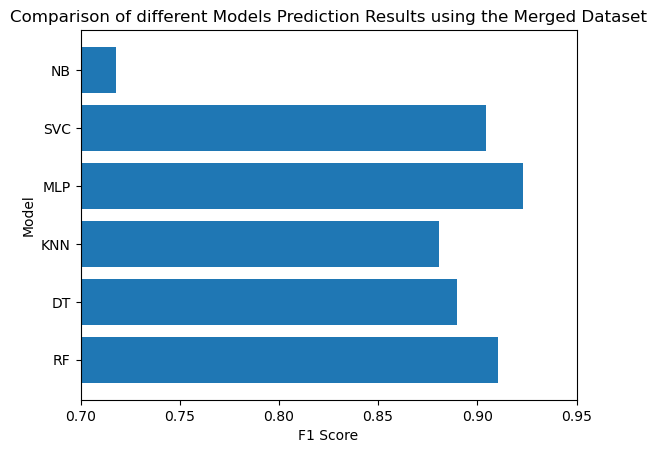

In [148]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(labels, scores)
plt.xlim([0.70, 0.95])
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("Comparison of different Models Prediction Results using the Merged Dataset")
plt.show()

# Results

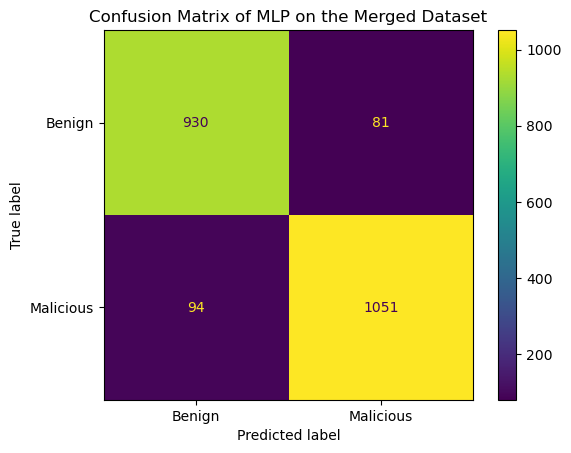

In [164]:
cm = confusion_matrix(mlp_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot()
plt.title("Confusion Matrix of MLP on the Merged Dataset")
plt.show()

# Bagging Multiple Models

#### Combining Predictions

In [113]:
bagging_pred = []
for i in range(0, len(y_test)):
    bagging_pred.append([rf_pred[i], mlp_pred[i], svc_pred[i], knn_pred[i], dt_pred[i]])

In [114]:
bagging_pred = list(map(lambda pred: 1 if sum(pred) > 2 else 0, bagging_pred))

#### Output Results

In [236]:
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       988
           1       0.93      0.90      0.92      1168

    accuracy                           0.91      2156
   macro avg       0.91      0.91      0.91      2156
weighted avg       0.91      0.91      0.91      2156



In [115]:
print(classification_report(bagging_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1036
           1       0.92      0.93      0.93      1120

    accuracy                           0.92      2156
   macro avg       0.92      0.92      0.92      2156
weighted avg       0.92      0.92      0.92      2156



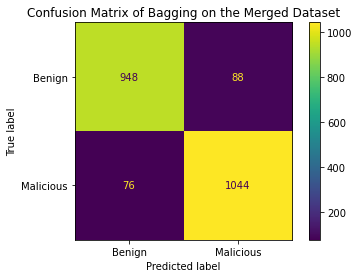

In [116]:
cm = confusion_matrix(bagging_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot()
plt.title("Confusion Matrix of Bagging on the Merged Dataset")
plt.show()

# False Prediction Analysis

## Extract Data

#### Filtering False and True Predictions

In [168]:
prediction = y_test == bagging_pred
prediction = pd.DataFrame({"index": prediction.index, "prediction": prediction.values})
test_labels = pd.DataFrame({"idx": y_test.index, "is_malicious": y_test.values})

In [169]:
prediction = pd.concat([prediction, test_labels], axis=1)

In [170]:
prediction = prediction.drop(["idx"], axis=1)

In [171]:
true_prediction = prediction[prediction["prediction"] == True]
false_prediction = prediction[prediction["prediction"] == False]

#### Extracting False Positives and False Negatives

In [196]:
true_positive = true_prediction[true_prediction["is_malicious"] == 1]["index"].to_numpy()
true_negative = true_prediction[true_prediction["is_malicious"] == 0]["index"].to_numpy()

In [197]:
true_positive = df[df.index.isin(true_positive)]
true_negative = df[df.index.isin(true_negative)]

In [198]:
false_positive = false_prediction[false_prediction["is_malicious"] == 0]["index"].to_numpy()
false_negative = false_prediction[false_prediction["is_malicious"] == 1]["index"].to_numpy()

In [199]:
false_positive = df[df.index.isin(false_positive)]
false_negative = df[df.index.isin(false_negative)]

## Analyze Data

#### Permissions

In [223]:
permission_columns = df.columns[1:len(true_positive.columns)-33]

In [224]:
tp_permissions = true_positive[permission_columns]
tn_permissions = true_negative[permission_columns]

In [225]:
fp_permissions = false_positive[permission_columns]
fn_permissions = false_negative[permission_columns]

In [227]:
tp_mean = tp_permissions.sum(axis=1).mean(axis=0)
tn_mean = tn_permissions.sum(axis=1).mean(axis=0)
fp_mean = fp_permissions.sum(axis=1).mean(axis=0)
fn_mean = fn_permissions.sum(axis=1).mean(axis=0)

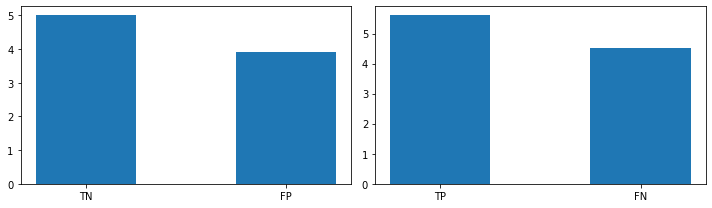

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.bar(["TN", "FP"], [tn_mean, fp_mean], width=0.5)
ax2.bar(["TP", "FN"], [tp_mean, fn_mean], width=0.5)
plt.tight_layout()

In [267]:
tp_permission_count = tp_permissions.mean(axis=0)
tn_permission_count = tn_permissions.mean(axis=0)
fp_permission_count = fp_permissions.mean(axis=0)
fn_permission_count = fn_permissions.mean(axis=0)

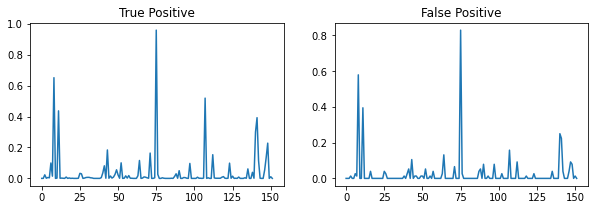

In [271]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(tp_permission_count.to_numpy())
ax1.set_title("True Positive")
ax2.plot(fp_permission_count.to_numpy())
ax2.set_title("False Positive")

plt.show()

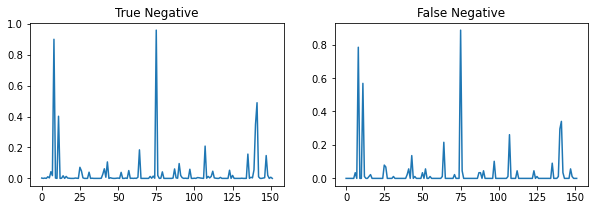

In [272]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 3))

ax3.plot(tn_permission_count.to_numpy())
ax3.set_title("True Negative")
ax4.plot(fn_permission_count.to_numpy())
ax4.set_title("False Negative")

plt.show()

In [299]:
tn_permission_count[8:9]

ACCESS_NETWORK_STATE    0.899789
dtype: float64

In [286]:
print(tp_permission_count[71:72])
print(fp_permission_count[71:72])
print(tn_permission_count[71:72])
print(fn_permission_count[71:72])

INSTALL_PACKAGES    0.163793
dtype: float64
INSTALL_PACKAGES    0.065789
dtype: float64
INSTALL_PACKAGES    0.012658
dtype: float64
INSTALL_PACKAGES    0.022727
dtype: float64


In [289]:
len(df[df["INSTALL_PACKAGES"] == 1])

891

In [295]:
len(df[(df["INSTALL_PACKAGES"] == 1) & (df["is_malicious"] == 1)])

824

In [296]:
len(df[(df["INSTALL_PACKAGES"] == 1) & (df["is_malicious"] == 0)])

67

In [297]:
len(false_positive[(false_positive["INSTALL_PACKAGES"] == 1) & (false_positive["is_malicious"] == 0)])

5

In [304]:
len(false_negative[(false_negative["INSTALL_PACKAGES"] == 1) & (false_negative["is_malicious"] == 0)])

0

In [305]:
##########

In [307]:
tn_permission_count[130:145]

STATUS_BAR_SERVICE        0.000000
STOP_APP_SWITCHES         0.001055
STORAGE_INTERNAL          0.000000
SUBSCRIBED_FEEDS_READ     0.000000
SUBSCRIBED_FEEDS_WRITE    0.000000
SYSTEM_ALERT_WINDOW       0.157173
TRANSMIT_IR               0.000000
UPDATE_APP_OPS_STATS      0.007384
UPDATE_DEVICE_STATS       0.003165
USE_CREDENTIALS           0.054852
VIBRATE                   0.349156
WAKE_LOCK                 0.489451
WRITE_APN_SETTINGS        0.010549
WRITE_GSERVICES           0.000000
WRITE_MEDIA_STORAGE       0.000000
dtype: float64